(1067, 1600, 3)


(-0.5, 1599.5, 1066.5, -0.5)

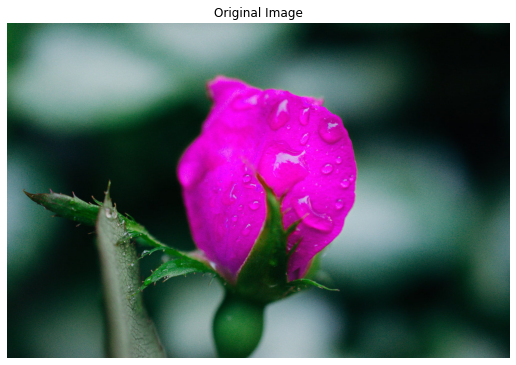

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.image as mimg
import numpy as np
from sklearn import cluster

path = './image1.jpeg'
im = mimg.imread(path) # imread is the function to read the image in the hard disk

print(im.shape)
# visualise this image 
plt.figure(1,figsize=(9,9))
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')


Text(0.5, 1.0, 'Blue component')

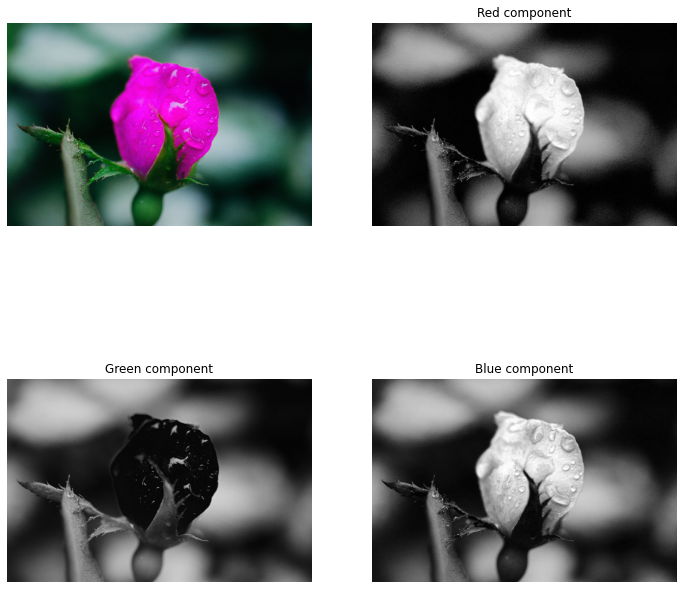

In [3]:
# seperate out R, G B channel of the image 

im_R = im[:,:,0] # this is red component
im_G = im[:,:,1] # this is green component
im_B = im[:,:,2] # this is blue component

plt.figure(1,figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(im_R,cmap='gray')
plt.axis('off')
plt.title('Red component')

plt.subplot(2,2,3)
plt.imshow(im_G,cmap='gray')
plt.axis('off')
plt.title('Green component')
plt.subplot(2,2,4)
plt.imshow(im_B,cmap='gray')
plt.axis('off')
plt.title('Blue component')


Text(0.5, 1.0, 'Blue component')

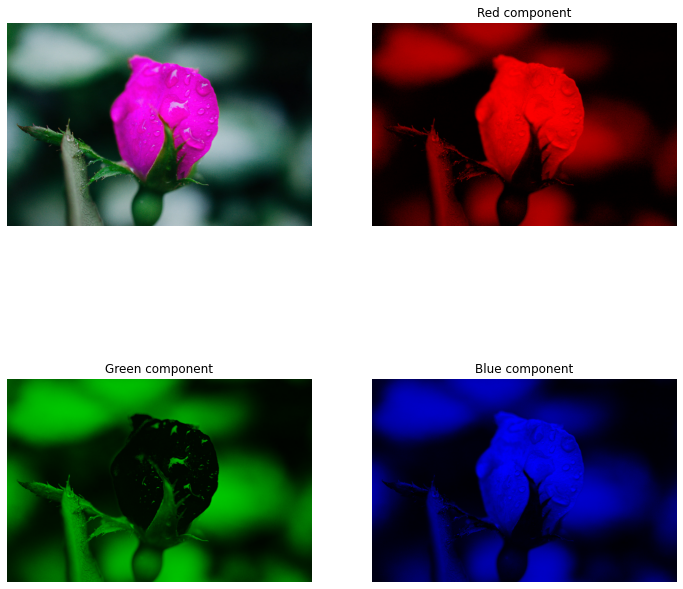

In [4]:
# 

IM_R = np.zeros((im.shape[0],im.shape[1],im.shape[2]),dtype='uint8')
IM_G = np.zeros((im.shape[0],im.shape[1],im.shape[2]),dtype='uint8')
IM_B = np.zeros((im.shape[0],im.shape[1],im.shape[2]),dtype='uint8')

# Red component 
IM_R[:,:,0]=im_R

# Green component 
IM_G[:,:,1]=im_G


# Blue component 
IM_B[:,:,2]=im_B


plt.figure(1,figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(IM_R,cmap='gray')
plt.axis('off')
plt.title('Red component')

plt.subplot(2,2,3)
plt.imshow(IM_G,cmap='gray')
plt.axis('off')
plt.title('Green component')

plt.subplot(2,2,4)
plt.imshow(IM_B,cmap='gray')
plt.axis('off')
plt.title('Blue component')


In [5]:
# lets apply kmeans on any of the channel 
red_channel = im_R.copy()

image_samples = red_channel.reshape(-1,1) # -1 means all the values 
print(red_channel.shape, image_samples.shape)



(1067, 1600) (1707200, 1)


In [8]:
# elbow method 
k = []
dist=[]

for i in range(1,11):
    kmModel = cluster.KMeans(i,random_state=2)
    kmModel = kmModel.fit(image_samples)
    dist.append(kmModel.inertia_)
    k.append(i)

print(k)
print(dist)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[9945354055.637096, 2293727768.8504667, 931970925.5493186, 435406343.20546186, 258420433.4061393, 179767069.03647816, 138351652.41614354, 104890283.30084825, 81374095.7700194, 66851224.79525937]


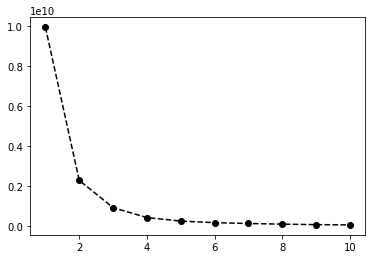

In [9]:
plt.figure(2)
plt.plot(k,dist,'--ko')


[0 1 2 3]


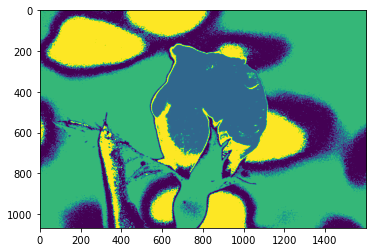

In [14]:
# 3 clusters are final from the elbow 

kmModel = cluster.KMeans(4,random_state=2)
kmModel = kmModel.fit(image_samples)

label = kmModel.labels_

# lets create the label image 
label_image = label.reshape(im_R.shape[0],im_R.shape[1])
print(np.unique(label_image))

plt.figure(2)
plt.imshow(label_image)


Text(0.5, 1.0, 'binary image for cluster4')

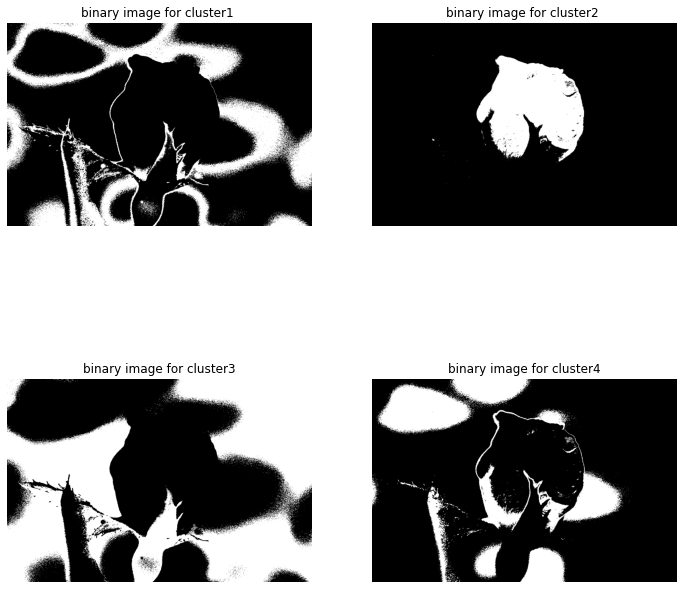

In [15]:
# binary images of the labels 
bin_1 = np.zeros((im_R.shape[0],im_R.shape[1]),dtype='uint8')
bin_2 = np.zeros((im_R.shape[0],im_R.shape[1]),dtype='uint8')
bin_3 = np.zeros((im_R.shape[0],im_R.shape[1]),dtype='uint8')
bin_4 = np.zeros((im_R.shape[0],im_R.shape[1]),dtype='uint8')


ind1 = label_image==0
ind2 = label_image==1
ind3 = label_image==2
ind4 = label_image==3

bin_1[ind1]=1
bin_2[ind2]=1
bin_3[ind3]=1
bin_4[ind4]=1



plt.figure(1,figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(bin_1,cmap='gray')
plt.axis('off')
plt.title('binary image for cluster1 ')

plt.subplot(2,2,2)
plt.imshow(bin_2,cmap='gray')
plt.axis('off')
plt.title('binary image for cluster2 ')

plt.subplot(2,2,3)
plt.imshow(bin_3,cmap='gray')
plt.axis('off')
plt.title('binary image for cluster3')
plt.subplot(2,2,4)
plt.imshow(bin_4,cmap='gray')
plt.axis('off')
plt.title('binary image for cluster4')


Text(0.5, 1.0, 'final output Image')

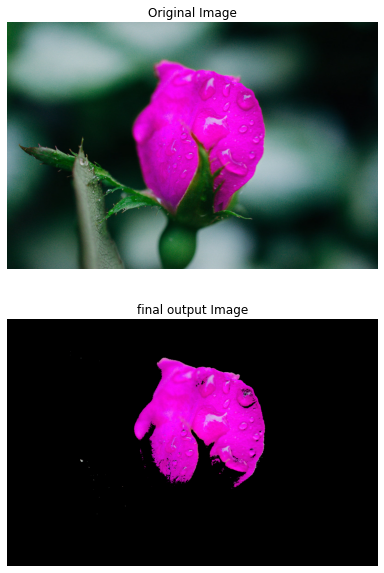

In [16]:
# cluster 2 is having ROI label 

temp_image = im.copy() # create the copy of the original color image 

ind_0 = bin_2==0
temp_image1 = temp_image[:,:,0]
temp_image2 = temp_image[:,:,1]
temp_image3 = temp_image[:,:,2]



temp_image1[ind_0]=0
temp_image2[ind_0]=0
temp_image3[ind_0]=0

temp_image[:,:,0]=temp_image1
temp_image[:,:,1]=temp_image2
temp_image[:,:,2]=temp_image3

plt.figure(1,figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')
plt.subplot(2,1,2)
plt.imshow(temp_image)
plt.axis('off')
plt.title('final output Image')
